In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import ot 
from sample_generator import sample_generation
from trend_decompose import l1tf

In [2]:
data = pd.read_csv('./data/data.csv')
data.head()

,x,y1,y2
0,0,0.1,0.100002
1,1,0.1,0.100004
2,2,0.1,0.100006
3,3,0.1,0.100010
4,4,0.1,0.100016


In [3]:
y1 = data["y1"].values
y2 = data["y2"].values
y1[40]+=0.5

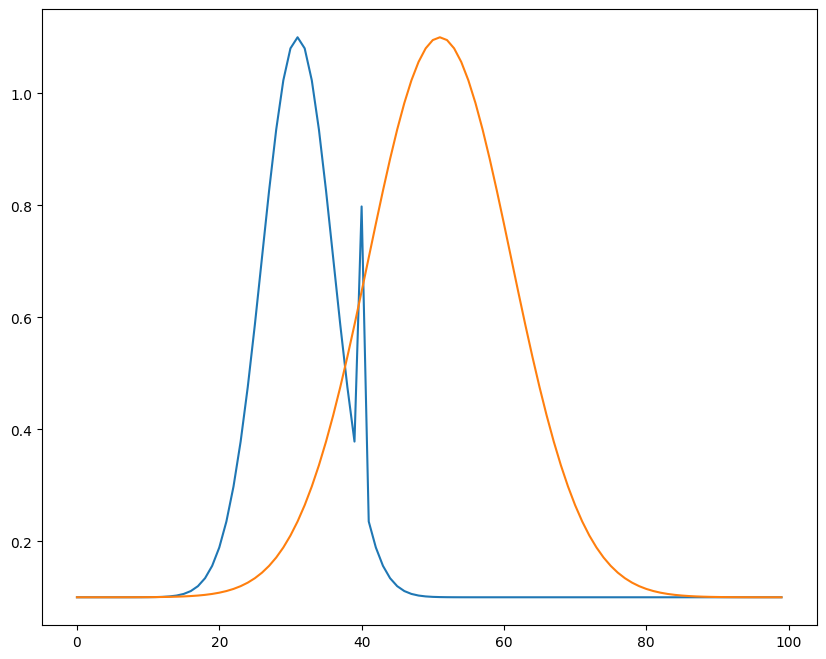

In [4]:
plt.figure(figsize = (10,8))
plt.plot(y1, label="y1")
plt.plot(y2, label="y2")
plt.show()

In [5]:
trend = l1tf(y1, 0.5)
residual = y1 - trend

In [6]:
def visualize(data,trend,threshold = None, fig_size = (30,16)):
    '''
    data: input data : numpy array
    trend: result of apply trend filter : numpy array
    threshold: for residual : scalar
    fig_size: figure size 
    '''
    fig = plt.figure(figsize=fig_size)
    #TREND & DATA
    plt.subplot(2,1,1)
    residual = data - trend
    plt.plot(np.arange(data.shape[0]),data,label = 'data')
    plt.plot(np.arange(data.shape[0]),trend, label = 'trend')
    if threshold:
        idx = np.where(np.abs(residual) > threshold)[0]
        plt.scatter(idx, data[idx],c = 'red')

    #RESIDUAL
    plt.subplot(2,1,2)
    plt.plot(np.arange(data.shape[0]),residual)
    if threshold:
        idx = np.where(np.abs(residual) > threshold)[0]
        plt.scatter(idx, residual[idx],c = 'red')

    plt.legend(loc = 'upper left')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


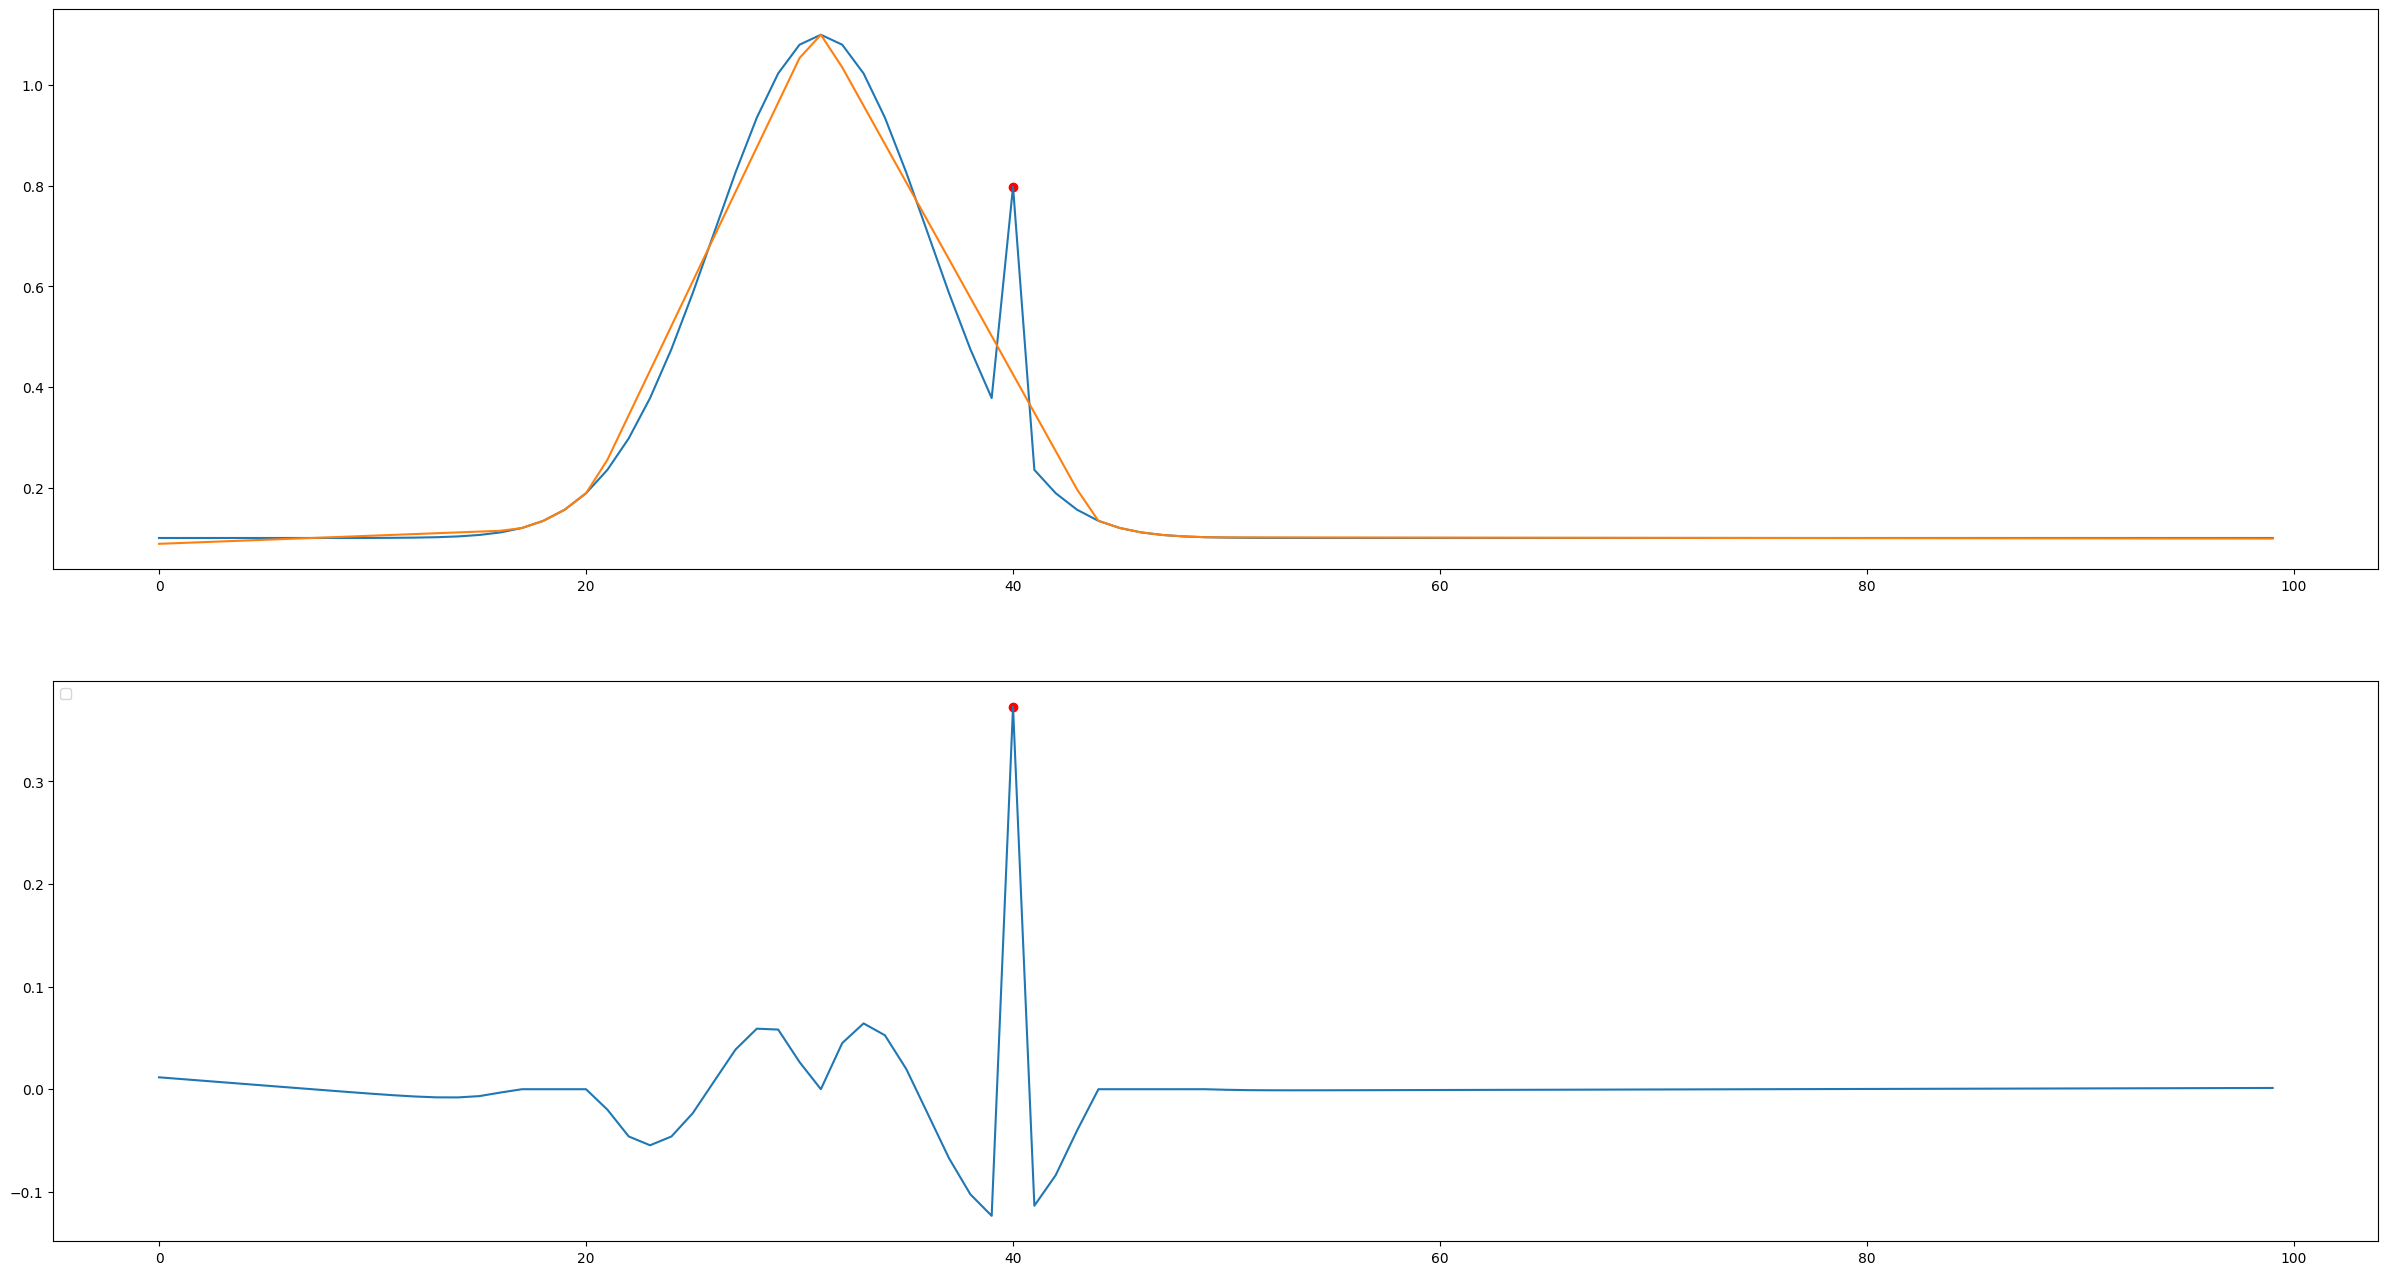

In [7]:
visualize(y1, trend, 0.2)

In [8]:
def res2prob(residual):
    residual = np.exp(-np.abs(residual))
    residual = residual/np.sum(residual)
    return residual

In [9]:
y1_trend = l1tf(y1,0.5)
y2_trend = l1tf(y2,0.5)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_res = res2prob(y1_res).reshape(-1,1)
y2_res = res2prob(y2_res).reshape(-1,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


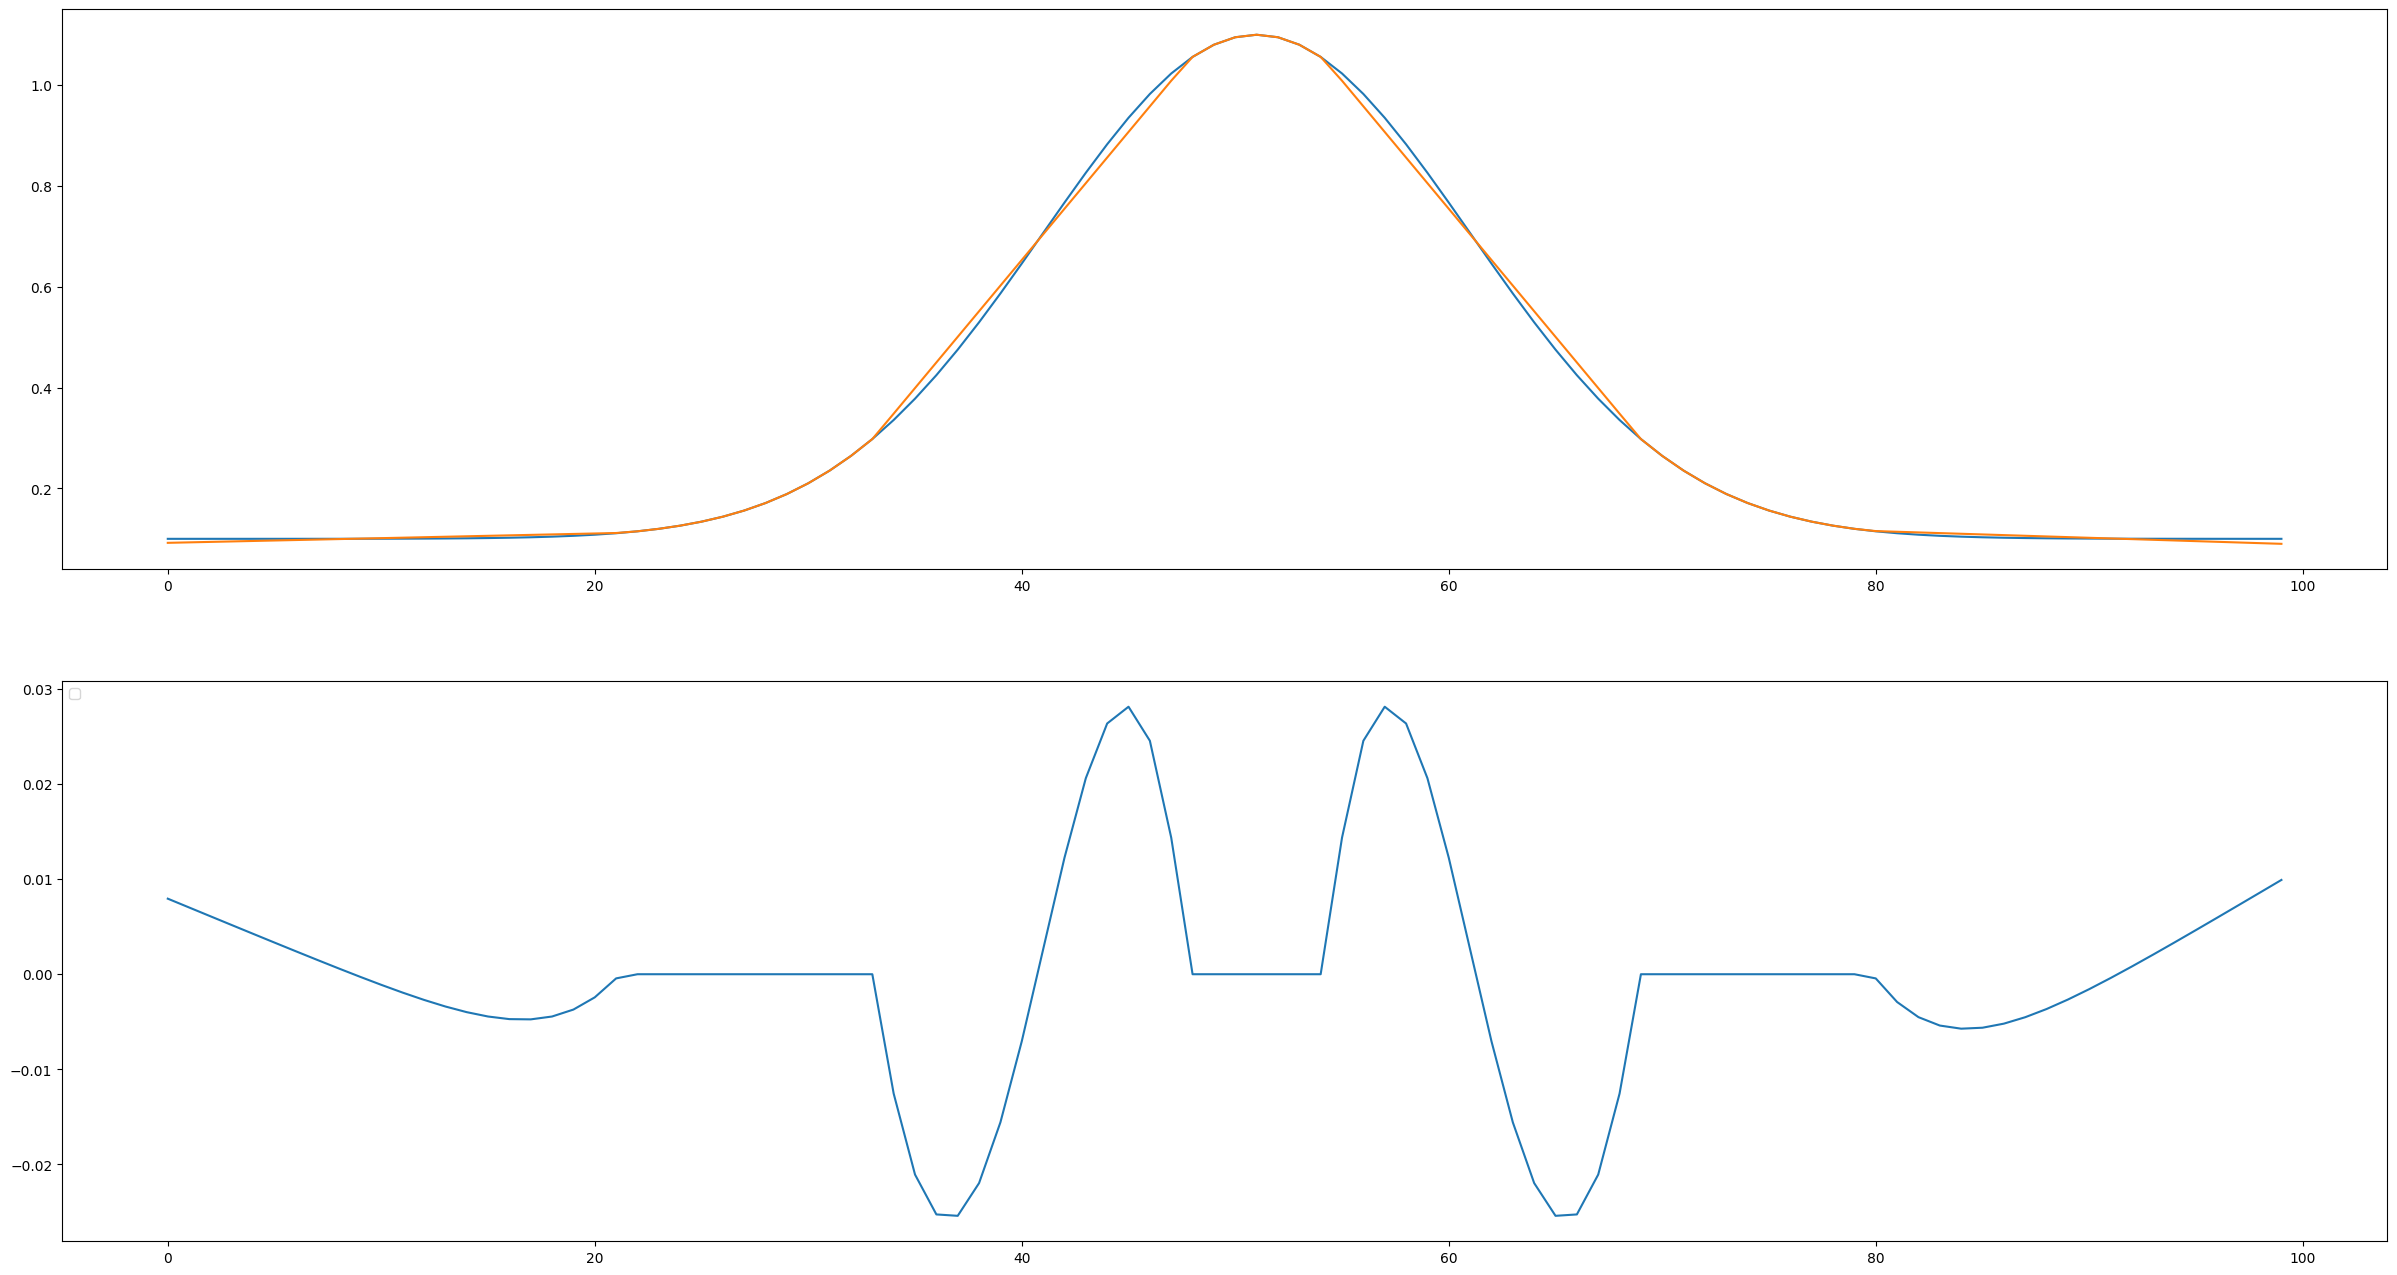

In [10]:
visualize(y2, y2_trend, 0.2)

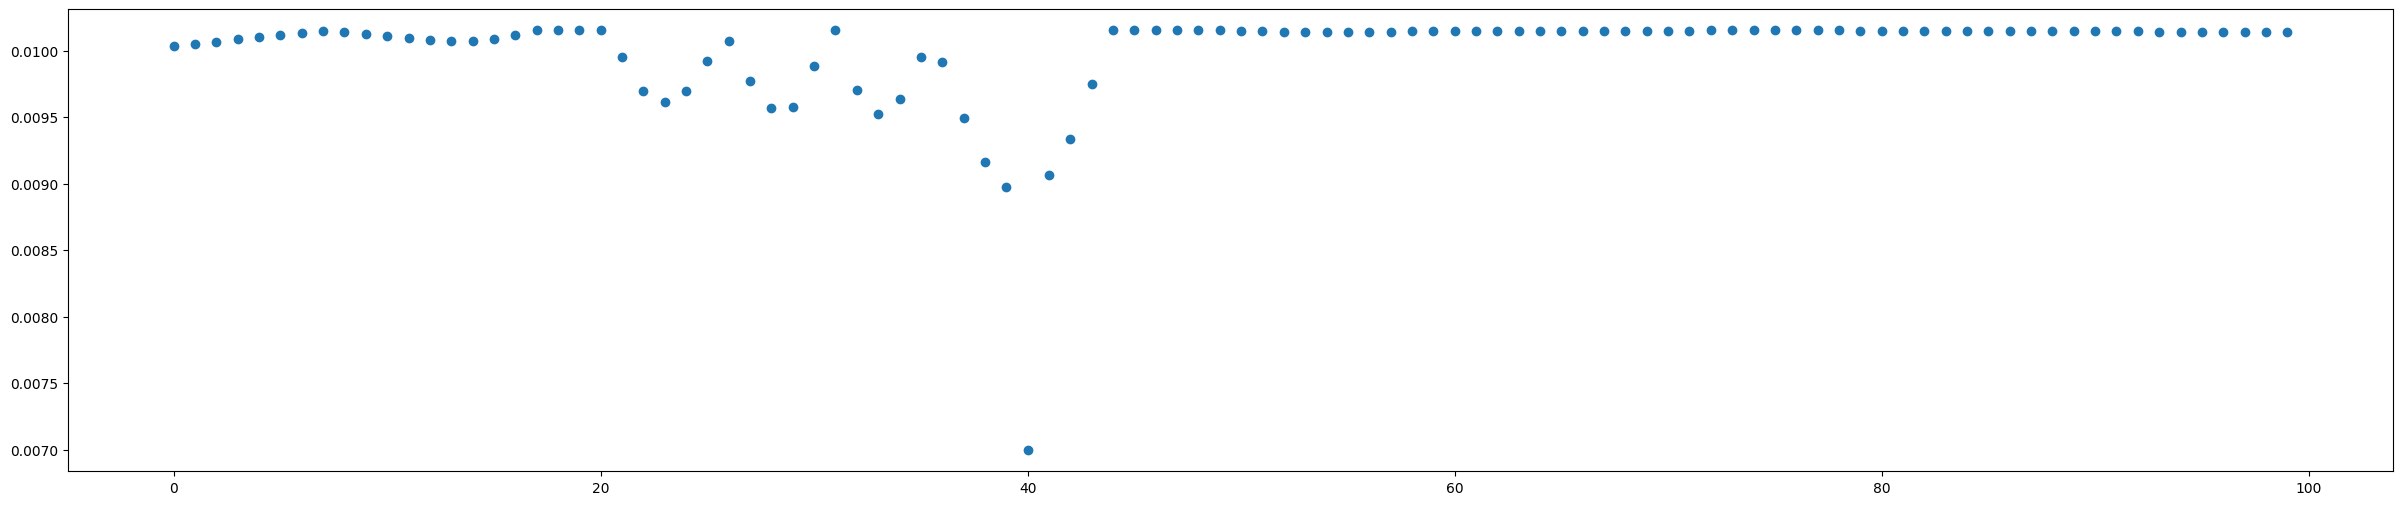

In [11]:
fig = plt.figure(figsize=(30,6))
plt.scatter(np.arange(y1_res.shape[0]),y1_res)

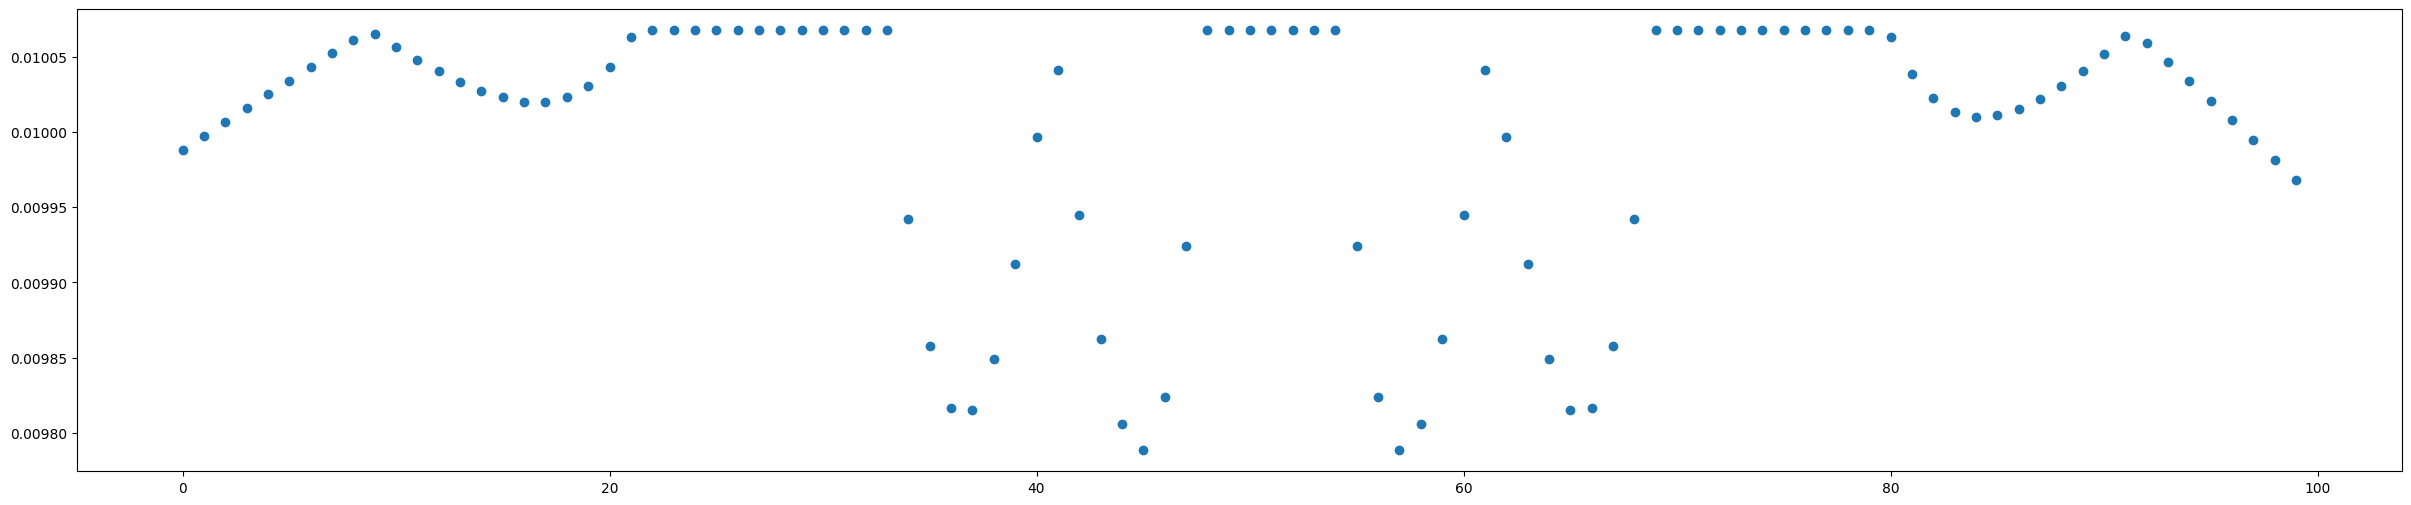

In [12]:
fig = plt.figure(figsize=(30,6))
plt.scatter(np.arange(y2_res.shape[0]),y2_res)

In [13]:
from metric import *

In [14]:
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)

In [15]:
print("Y1 shape: ", y1.shape)
print("Y1 dtype: ", y1.dtype)

Y1 shape:  (100, 1)
Y1 dtype:  float64


In [22]:
raw_metric = t_opw1_dist(y1, y2, metric='euclidean')

In [17]:
import seaborn as sns

<AxesSubplot:>

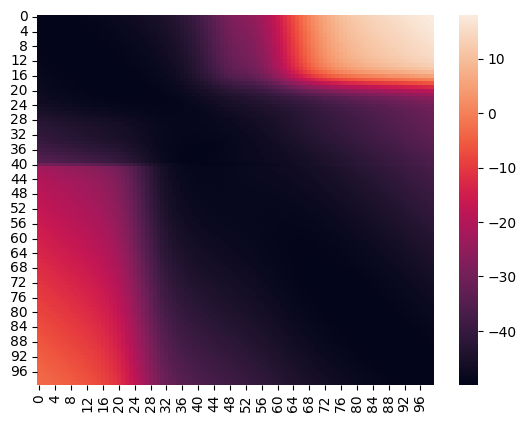

In [18]:
sns.heatmap(raw_metric)

In [20]:
posterior_metric = add_posterior_dist(y1_res, y2_res, raw_metric)

<AxesSubplot:>

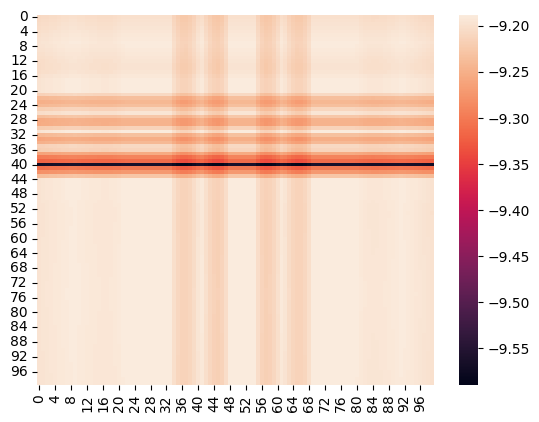

In [24]:
sns.heatmap(np.log(np.outer(y1_res, y2_res)))

In [ ]:
posterior_metric.max()

-23.691367851967804

In [ ]:
raw_metric.max()

-32.928244855933926